In [33]:

file_path='station.txt'
f=open(file_path,'r',encoding='utf-8')
lines=f.readlines()
f.close()
all=''
for i in lines:
    all = all + i
areas = all.split('@')
length=len(areas)
station_name={}
for i in range(1,length):
    tmps = areas[i].split('|')
    station_name[tmps[1]] = tmps[2]
f1=open('station.txt','a+',encoding='utf-8')
for data in station_name:
    f1.write(data+' '+station_name[data]+'\n')
f1.close()

In [11]:
import requests
import bs4
import json
headers = {
    "User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) A'
                  'ppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.116 Safari/537.36',
}


def GT_clawer() -> object:
    station_name = {}
    name_station = {}
    f = open('station.txt', encoding='utf-8')
    lines = f.readlines()
    f.close()
    for i in lines:
        temps = i.split(' ')
        station_name[temps[0]] = temps[1][:-1]
        name_station[temps[1][:-1]] = temps[0]
    while True:
        #print('车票查询业务开始。。。。。。')
        info1 = input('请输入出发站和终点站(格式为:广汉/成都),中间无空格: ')
        fromName = info1.strip().split('/')[0]
        toName = info1.strip().split('/')[1]
        startDate = input('请输入查询日期,不早于当前日期(格式为:2020-05-29): ')
        if fromName not in station_name:
            print('当前系统无此出发站')
            continue
        if toName not in station_name:
            print('当前系统无此终点站')
            continue
        url = 'https://i.meituan.com/uts/train/train/querytripnew?fromPC=1' \
              '&train_source=meituanpc@wap&uuid=a2bab8b38b364d7f8d7a.1590661315.1.0.0' \
              '&from_station_telecode={}&to_station_telecode={}&yupiaoThreshold=0&start_date={}' \
              '&isStudentBuying=false'.format(station_name[fromName], station_name[toName], startDate)

        response = requests.get(url, headers=headers).json()
        for train in response['data']['trains']:
            data=open("information.txt","w+")
            print('车次号:'+train['full_train_code'] + '     出发时间:' + train['start_time'] + '     到达时间:' + train[
                'arrive_time'] + '     耗时:' +
                  train['run_time'] + '     出发站:' + train['from_station_name'] + '     终点站:' + train['to_station_name'])
            seats_info = ''
            data.close()
            for seats in train['seats']:
                seats_info += str(seats['seat_type_name'])+'--'
                seats_info += str(seats['seat_min_price'])+'元--'
                seats_info += str(seats['seat_yupiao'])
                seats_info += '张      '
            print('票价信息:   ' + seats_info+'\n')
        print('所有车票信息打印完毕')
        print('如果想要继续查询, 请按y键, 否则按n键')
        order = input()
        if order == 'y':
            continue
        if order == 'n':
            print('你已经退出查询服务。。。。。。')
            break


def main_meau():
    print('|*----指令列表----*|')
    print('获取指令列表----h')
    print('查询火车票----g')
    print('退出系统----q')



print('功能: 爬取美团火车票信息')
main_meau()
while True:
    print('请输入指令, 按h可以获得指令列表: ')
    command = input()
    if command == 'h':
        main_meau()
    if command == 'q':
        break
    if command == 'g':
        GT_clawer()
print('Bye--Bye')



功能: 爬取美团火车票信息
|*----指令列表----*|
获取指令列表----h
查询火车票----g
退出系统----q
请输入指令, 按h可以获得指令列表: 


 g
请输入出发站和终点站(格式为:广汉/成都),中间无空格:  北京/德州
请输入查询日期,不早于当前日期(格式为:2020-05-29):  2021-01-25


车次号:G471     出发时间:07:04     到达时间:08:24     耗时:01:20     出发站:北京南     终点站:德州东
票价信息:   商务座--455.0元--0张      一等座--242.0元--5张      二等座--144.0元--99张      

车次号:G105     出发时间:07:20     到达时间:08:40     耗时:01:20     出发站:北京南     终点站:德州东
票价信息:   商务座--455.0元--8张      一等座--242.0元--99张      二等座--142.0元--99张      

车次号:G107     出发时间:--:--     到达时间:--:--     耗时:00:00     出发站:北京南     终点站:德州东
票价信息:   

车次号:G469     出发时间:--:--     到达时间:--:--     耗时:00:00     出发站:北京南     终点站:德州东
票价信息:   

车次号:G111     出发时间:--:--     到达时间:--:--     耗时:00:00     出发站:北京南     终点站:德州东
票价信息:   

车次号:G355     出发时间:08:40     到达时间:10:12     耗时:01:32     出发站:北京南     终点站:德州东
票价信息:   商务座--455.0元--0张      一等座--242.0元--3张      二等座--144.0元--99张      

车次号:G115     出发时间:09:20     到达时间:10:41     耗时:01:21     出发站:北京南     终点站:德州东
票价信息:   商务座--488.0元--5张      一等座--242.0元--99张      二等座--144.0元--99张      

车次号:G179     出发时间:--:--     到达时间:--:--     耗时:00:00     出发站:北京南     终点站:德州东
票价信息:   

车次号:G33     出发时间:09:40     到达时间:11:14     耗时:01:34    

 y
请输入出发站和终点站(格式为:广汉/成都),中间无空格:  广汉/成都
请输入查询日期,不早于当前日期(格式为:2020-05-29):  2021-01-25


车次号:C6227     出发时间:07:34     到达时间:08:00     耗时:00:26     出发站:广汉北     终点站:成都东
票价信息:   二等座--18.0元--0张      无座--18.0元--1张      

车次号:C6303     出发时间:09:04     到达时间:09:34     耗时:00:30     出发站:广汉北     终点站:成都东
票价信息:   二等座--18.0元--0张      一等座--29.0元--0张      无座--18.0元--0张      

车次号:D1855     出发时间:09:40     到达时间:09:58     耗时:00:18     出发站:广汉北     终点站:成都东
票价信息:   二等座--18.0元--99张      一等座--29.0元--99张      无座--18.0元--0张      

车次号:C6325     出发时间:10:41     到达时间:11:01     耗时:00:20     出发站:广汉北     终点站:成都东
票价信息:   二等座--18.0元--99张      无座--18.0元--99张      

车次号:C6333     出发时间:12:23     到达时间:12:49     耗时:00:26     出发站:广汉北     终点站:成都东
票价信息:   二等座--18.0元--99张      无座--18.0元--99张      

车次号:C6327     出发时间:13:23     到达时间:13:44     耗时:00:21     出发站:广汉北     终点站:成都东
票价信息:   二等座--18.0元--99张      无座--18.0元--99张      

车次号:C6329     出发时间:13:49     到达时间:14:09     耗时:00:20     出发站:广汉北     终点站:成都东
票价信息:   二等座--18.0元--0张      无座--18.0元--0张      

车次号:D1931     出发时间:16:10     到达时间:16:28     耗时:00:18     出发站:广汉北     终

 n


你已经退出查询服务。。。。。。
请输入指令, 按h可以获得指令列表: 


 q


Bye--Bye


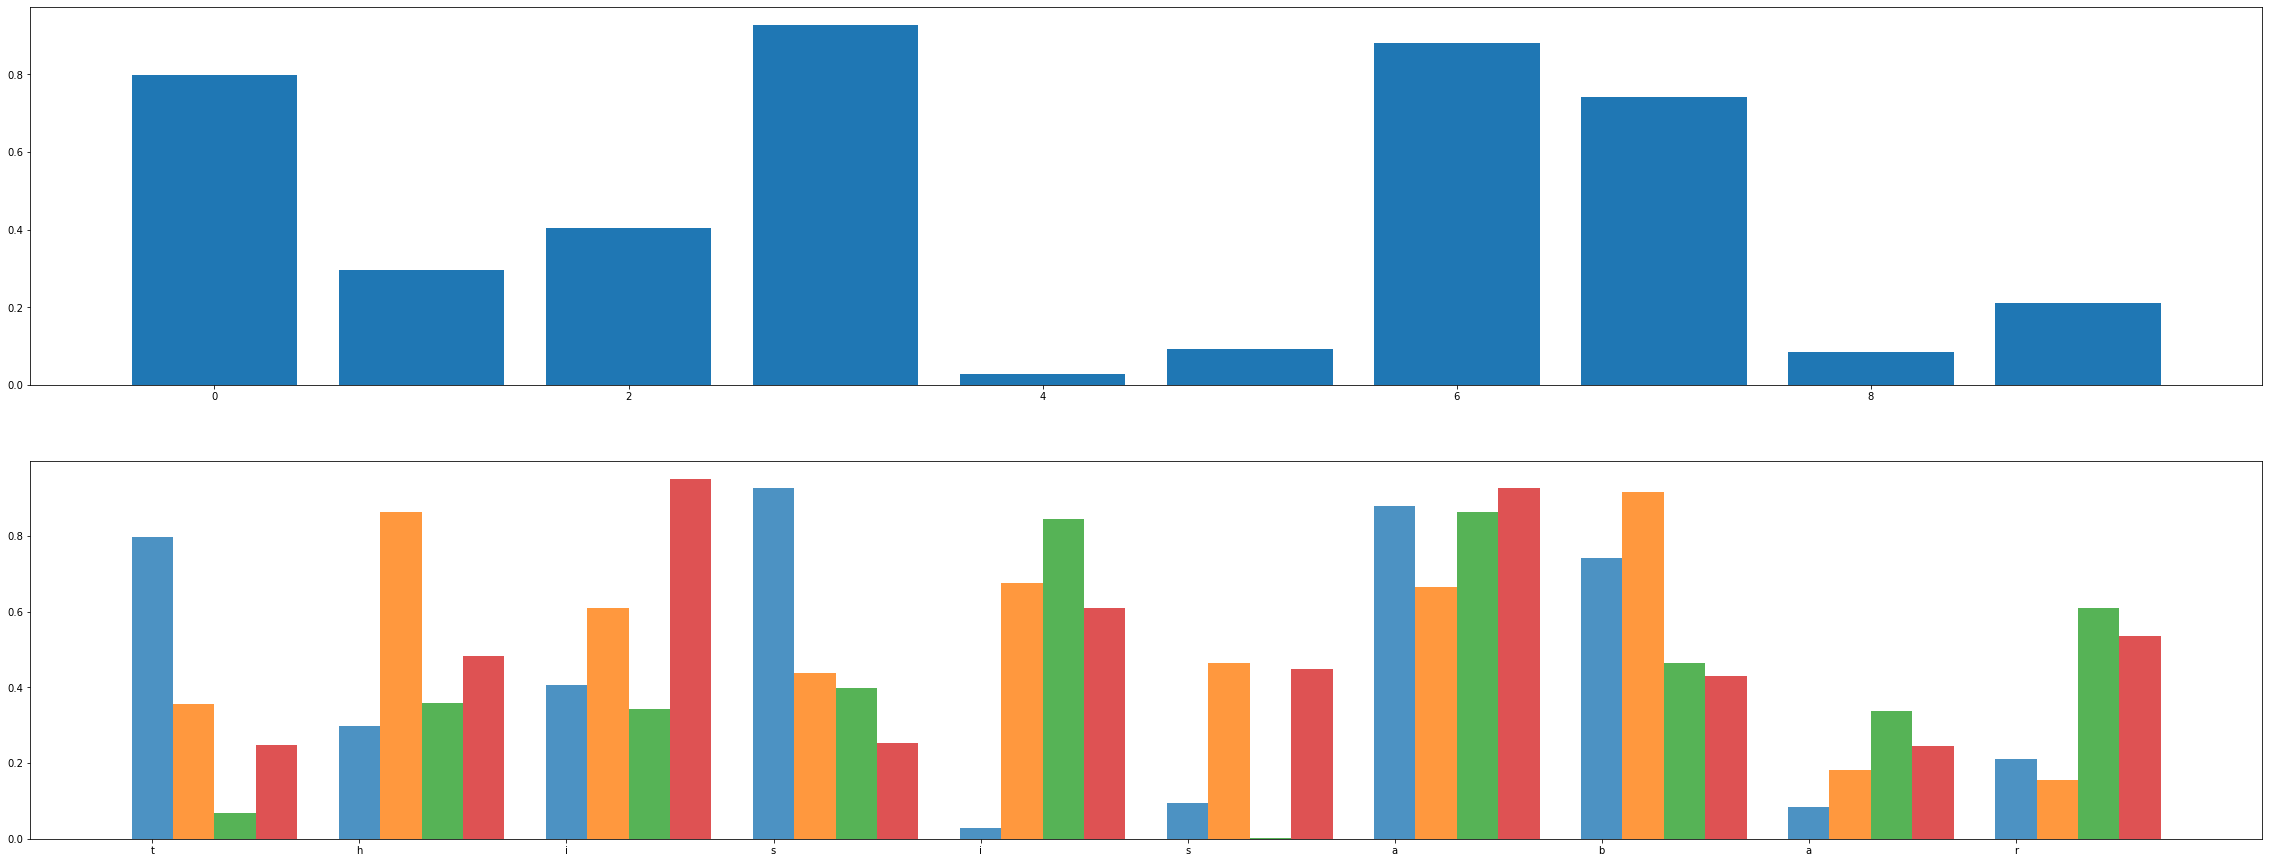

In [1]:
#API: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

opacity = 0.8
data = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

fig, ax = plt.subplots()
index = range(len(data))

plt.subplot(4, 1, 1)
plt.bar(index, data['a'])

plt.subplot(4, 1, 2)
plt.bar(index, data['a'], alpha=opacity, width=0.2)
plt.bar([i+0.2 for i in index], data['b'], alpha=opacity, width=0.2)
plt.bar([i+0.4 for i in index], data['c'], alpha=opacity, width=0.2)
plt.bar([i+0.6 for i in index], data['d'], alpha=opacity, width=0.2)

fig.set_size_inches(40, 32)
plt.xticks(index, list('thisisabar'))
plt.show()

In [47]:
import csv

headers = ['出发站','终点站','车次','最低票价']

rows = [
        {'出发站':'北京','终点站':'德州','车次':'G471','最低票价':144},
        {'出发站':'北京','终点站':'德州','车次':'G105','最低票价':142},
        {'出发站':'北京','终点站':'德州','车次':'G107','最低票价':'--'},
        {'出发站':'北京','终点站':'德州','车次':'G469','最低票价':'--'},
    ]

with open('test2.csv','w',newline='')as f:
    f_csv = csv.DictWriter(f,headers)
    f_csv.writeheader()
    f_csv.writerows(rows)

In [48]:
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# 读入数据
iris = pd.read_csv("test2.csv") # the iris dataset is now a Pandas DataFrame

# 看下数据前5行
iris.head()

,出发站,终点站,车次,最低票价
0,北京,德州,G471,144
1,北京,德州,G105,142
2,北京,德州,G107,--
3,北京,德州,G469,--
